IMPORTING and PREPARING DATA - since data has no missing values, and gaussian naive bayes is capable of handling continuous real values, we do not need any data clearning 

In [464]:
import pandas as pd
names = ["word_freq_make",         
"word_freq_address",      
"word_freq_all",          
"word_freq_3d",           
"word_freq_our",          
"word_freq_over",         
"word_freq_remove",       
"word_freq_internet",     
"word_freq_order",        
"word_freq_mail",         
"word_freq_receive",      
"word_freq_will",         
"word_freq_people",       
"word_freq_report",       
"word_freq_addresses",    
"word_freq_free",         
"word_freq_business",     
"word_freq_email",        
"word_freq_you",          
"word_freq_credit",       
"word_freq_your",         
"word_freq_font",         
"word_freq_000",          
"word_freq_money",        
"word_freq_hp",           
"word_freq_hpl",          
"word_freq_george",       
"word_freq_650",          
"word_freq_lab",          
"word_freq_labs",         
"word_freq_telnet",       
"word_freq_857",          
"word_freq_data",         
"word_freq_415",          
"word_freq_85",           
"word_freq_technology",   
"word_freq_1999",         
"word_freq_parts",        
"word_freq_pm",           
"word_freq_direct",       
"word_freq_cs",           
"word_freq_meeting",      
"word_freq_original",     
"word_freq_project",      
"word_freq_re",           
"word_freq_edu",          
"word_freq_table",        
"word_freq_conference",   
"char_freq_;",            
"char_freq_(",            
"char_freq_[",            
"char_freq_!",            
"char_freq_$",            
"char_freq_#",            
"capital_run_length_average", 
"capital_run_length_longest", 
"capital_run_length_total", "class"]
df = pd.read_csv("spambase.csv", names = names)

VIEWING DATA

In [423]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [424]:
df.shape

(4601, 58)

BUILDING MACHINE LEARNING MODEL

In [425]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=34)

In [449]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

TESTING ACCURACY OF MODEL
METHOD 1) mean accuracy

In [451]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8306188925081434

METHOD 2) ROC AUC

In [452]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.9524317532275549

METHOD 3) confusion matrix

In [453]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[415, 141],
       [ 15, 350]])

In [454]:
# accuracy is good using confusion matrix as large numbers in top left and bottom right corners
# and small numbers in top right and bottom left corners

METHOD 4) precision and recall

In [455]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.6924227318045862

In [456]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9592541436464088

VISUALISING OUTPUT OF MODEL

all the above metrics indicate that the model is quite accurate, with only a small issue with precision. However below is a visual aid to demonstrate how accurate the model is by roc auc measures. 

Text(0, 0.5, 'True Positive Rate')

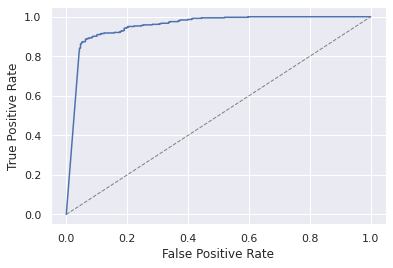

In [457]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# the below indicates a near perfect classifier (0.97)

BUILDING IMPLEMENTATION OF MODEL
- below is an function that is able to predict if an email entered as a text is spam or not
- it converts the text to the relevant data, then pushes it in to the model which returns the probability that an email is spam or not


In [472]:
from collections import Counter, defaultdict

def predict_spam(text):
    text = text.split(" ")
    totalWords = len(text)
    totalChar = 0
    
    keyWords = ["make", "address","all","3d", "our", "over", "remove", "internet", "order", "mail", "receive", "will", "people", "report", "addresses", "free", "business", "email", "you", "credit", "your", "font", "000", "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857", "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs", "meeting", "original", "project", "re", "edu", "table", "conference"]
    keyChar =  [";", "(", "[", "!", "$", "#"]
    keyWordsCount = Counter(keyWords)
    keyCharCount = Counter(keyChar)
    for word in text:
        if word in keyWords:
            keyWordsCount[word]+=1
        for char in word:
            if char in keyChar:
                keyCharCount[char]+=1
                totalChar+=1
    featureData = []
    for word in keyWords:
        if totalWords > 0: 
            featureData.append((keyWordsCount[word]-1)/totalWords * 100) 
        else:
            featureData.append(0)
    for char in keyChar: 
        if totalChar > 0:
            featureData.append((keyCharCount[char]-1)/totalChar * 100) 
        else:
            featureData.append(0)
    
    # calculate average length of uninterrupted sequences of capital letters
    text+=" " 
    insideCaps = False
    capsRunLength = 0
    numCapsRuns = 0
    lengthlongestCaps = 0
    lenCap = 0
    for letter in " ".join(text):
        if letter.isupper():
            if not insideCaps:
                insideCaps = True
            capsRunLength+=1
            lenCap+=1
        elif insideCaps: 
            insideCaps = False
            numCapsRuns+=1
            lengthlongestCaps = max(lengthlongestCaps, lenCap)
            lenCap = 0
            
    average = 0 if not numCapsRuns else capsRunLength/numCapsRuns
    featureData.append(average)
    featureData.append(lengthlongestCaps)
    featureData.append(capsRunLength)
    data = {}
    for i in range(len(names) - 1):
        data[names[i]] = featureData[i] 
    data = [data]
    return round(model.predict_proba(pd.DataFrame(data))[0][0])

EXAMPLES of prediction function being used
1) example emails that are not spam

In [473]:
predict_spam("we must make an address that will receive a report SELL NOW!!")

0.0

In [474]:
predict_spam("")

0.0

In [475]:
predict_spam("This is a normal email!")

0.0

2) example emails that are spam

In [476]:
predict_spam("FJDSLKAJFLKDSJ AFDSL JFLDASJL DFSLJ FADSL LFADSJLFDJASL FJDSLIAJ FLDSA JIFL DSAI FAJDSLI JFLD SAJJF DASL LFA JSLKFLKADS JFOID SJLF JADSL JFLKAJS DL FLDSJFDLASK HFADS FADHSLKJF HADSKJHF KJASD F AHDS FHADSKJL HFJKHLKSJDF HKLJDAS HFKLADS JHFKLDAS FJDSA LFDAS")

1.0

In [477]:
predict_spam("PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!VPAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!V V V V V V V V PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!!!!!!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!VPAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!V V V V V V V V PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!!!!!!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!VPAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!V V V V V V V V PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!!!!!!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!VPAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!V V V V V V V V PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!!!!!!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!VPAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!V V V V V V V V PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!! PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!PAY NOW PAY NOW CREDIT CARD SCAM !!!!!!!! your missing out PAY NOW PAY NOW!!!!!!!!!!")

1.0